<a href="https://colab.research.google.com/github/nailanabq/DataMining/blob/main/Case_Study_01_Data_Mining_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Study Case 1 Data Mining Kelompok 1**

Ketua: Achmad Reza Fahcruroji (11200940000024)

Anggota:

- Firdha Wulandari (11200940000020)
- Issa Bella Safitri (11200940000021)
- Lugis Budiman (11200940000022)
- Naila Nabiha Qonita (11200940000053)

## Import library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

## Load data from GitHub

In [3]:
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/jakarta.csv
!wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/depok.csv
!wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/tangerang.csv
dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')

dfJ.shape, dfD.shape, dfT.shape

mkdir: cannot create directory ‘data’: File exists
--2023-07-21 07:38:57--  https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/jakarta.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63832 (62K) [text/plain]
Saving to: ‘data/jakarta.csv’

jakarta.csv         100%[===================>]  62.34K  --.-KB/s    in 0.006s  

2023-07-21 07:38:57 (10.5 MB/s) - ‘data/jakarta.csv’ saved [63832/63832]

--2023-07-21 07:38:57--  https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/depok.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP requ

((1024, 26), (998, 26), (128, 26))

## Preprocessing

### Menghapus sebagian missing values pada setiap dataframe

Pada masing-masing tabel, terlihat terdapat beberapa baris kosong pada kolom kolom tertentu, serta terdapat beberapa kolom yang setiap barisnya kosong. Sehingga kita akan menghapus beberapa baris yang memiliki kurang dari 4 kolom terisi dan kolom-kolom yang setiap barisnya kosong.

In [112]:
def del_nan(data):
  data.dropna(axis=0, thresh=4, inplace=True)
  data.dropna(axis=1, how='all', inplace=True)
  return data.shape

In [113]:
del_nan(dfJ), del_nan(dfD), del_nan(dfT)

((121, 14), (118, 14), (124, 14))

### Menambahkan kolom "Kota" ke dataframe

Hal ini dilakukan agar membedakan data ketika disatukan menjadi satu dataframe

In [114]:
dfJ.insert(1, 'Kota', 'Jakarta')
dfD.insert(1, 'Kota', 'Depok')
dfT.insert(1, 'Kota', 'Tangerang')

### Mengubah kolom harga menjadi dalam satuan juta

In [115]:
dfJ['harga'] = dfJ['harga']/1000000

### Menyatukan seluruh dataframe

In [116]:
df = pd.concat([dfJ, dfD, dfT], ignore_index=True)
df.shape

(363, 15)

### Perbaikan missing value

In [117]:
df.isnull().sum()

created_at      0
Kota            0
LT              0
LB              0
KT              0
KM              0
garasi        256
carport        87
lokasi          0
sertifikat      4
listrik        29
hadap         216
harga           0
URL             0
deskripsi       9
dtype: int64

In [118]:
# Mengisi missing value variabel listrik dengan median
listrik = df['listrik'].median()
df['listrik'] = df['listrik'].fillna(listrik)

# Mengisi missing value variabel garasi dan carport dengan 0
garasi = df.garasi.fillna('0')
df['garasi'] = df['garasi'].fillna(garasi)
carport = df.carport.fillna('0')
df['carport'] = df['carport'].fillna(carport)
df.isnull().sum()

created_at      0
Kota            0
LT              0
LB              0
KT              0
KM              0
garasi          0
carport         0
lokasi          0
sertifikat      4
listrik         0
hadap         216
harga           0
URL             0
deskripsi       9
dtype: int64

Hadap kita biarkan kosong, karena tidak diketahui

### Mengubah tipe data

Beberapa tipe data masih salah, sehingga perlu dilakukan perbaikan untuk memudahkan kita mengolah data

In [119]:
df.dtypes

created_at     object
Kota           object
LT             object
LB            float64
KT            float64
KM            float64
garasi         object
carport        object
lokasi         object
sertifikat     object
listrik       float64
hadap          object
harga         float64
URL            object
deskripsi      object
dtype: object

In [120]:
df['Kota'] = df['Kota'].astype('category')
df['LT'] = df['LT'].astype('int64')
df['LB'] = df['LT'].astype('int64')
df['KT'] = df['KT'].astype('int64')
df['KM'] = df['KM'].astype('int64')
df['garasi'] = df['garasi'].astype('int64')
df['carport'] = df['carport'].astype('int64')
df['lokasi'] = df['lokasi'].astype('category')
df['sertifikat'] = df['sertifikat'].astype('category')
df['listrik'] = df['listrik'].astype('category')
df['hadap'] = df['hadap'].astype('category')
df.dtypes

created_at      object
Kota          category
LT               int64
LB               int64
KT               int64
KM               int64
garasi           int64
carport          int64
lokasi        category
sertifikat    category
listrik       category
hadap         category
harga          float64
URL             object
deskripsi       object
dtype: object

### Lakukan *duplicate backward* dan *forward* untuk mengisi kekosongan nilai pada hadap

In [121]:
df.bfill(inplace=True)
df.isnull().sum()

created_at    0
Kota          0
LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        0
sertifikat    0
listrik       0
hadap         2
harga         0
URL           0
deskripsi     0
dtype: int64

In [122]:
df.ffill(inplace=True)
df.isnull().sum()

created_at    0
Kota          0
LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        0
sertifikat    0
listrik       0
hadap         0
harga         0
URL           0
deskripsi     0
dtype: int64

Karena semua missing value sudah teratasi maka data sudah siap untuk digunakan pengolahan

## Visualisasi

### Histogram harga rumah di setiap kota

#### Jakarta

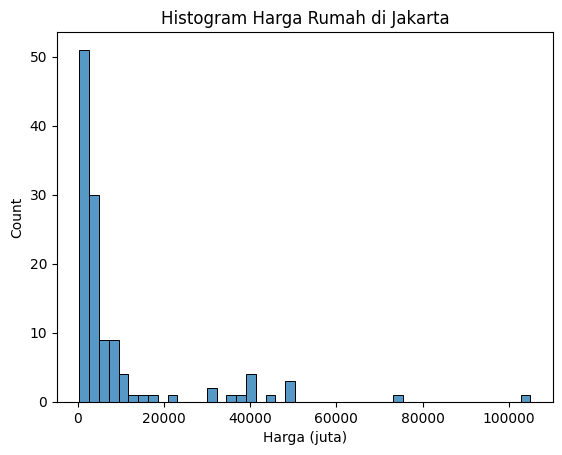

In [123]:
sns.histplot(data = dfJ, x='harga').set(title='Histogram Harga Rumah di Jakarta', xlabel='Harga (juta)')
plt.show()

Karena terdapat outlier maka kita pisahkan terlebih dahulu agar mendapatkan visualisasi yang lebih baik

In [124]:
index = (dfJ.harga  - dfJ.harga.mean()) <= (2*dfJ.harga.std())
no_outlier_jakarta = dfJ[index]

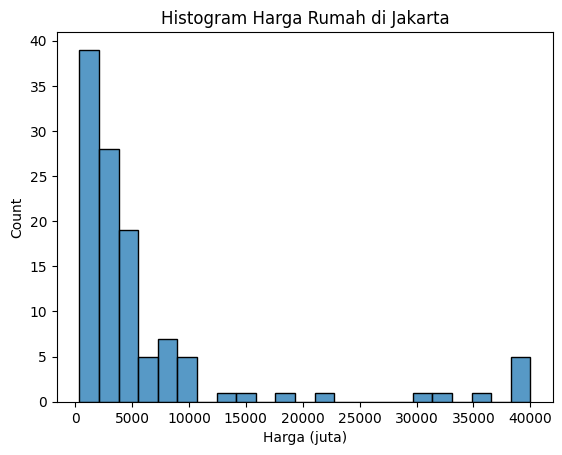

In [125]:
sns.histplot(data=no_outlier_jakarta, x='harga').set(title='Histogram Harga Rumah di Jakarta', xlabel='Harga (juta)')
plt.show()

#### Depok

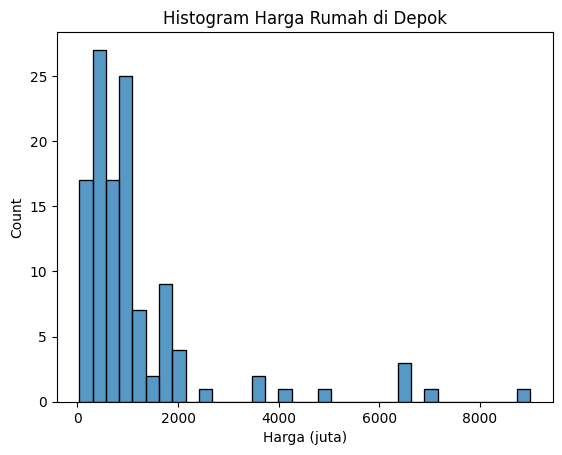

In [126]:
sns.histplot(data=dfD, x='harga').set(title='Histogram Harga Rumah di Depok', xlabel='Harga (juta)')
plt.show()

Karena terdapat outlier maka kita pisahkan terlebih dahulu agar mendapatkan visualisasi yang lebih baik

In [127]:
index = (dfD.harga  - dfD.harga.mean()) <= (2*dfD.harga.std())
no_outlier_depok = dfD[index]

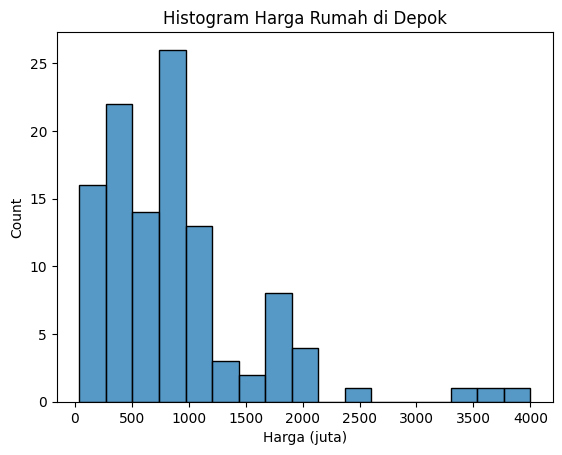

In [128]:
sns.histplot(data=no_outlier_depok, x='harga').set(title='Histogram Harga Rumah di Depok', xlabel='Harga (juta)')
plt.show()

#### Tangerang

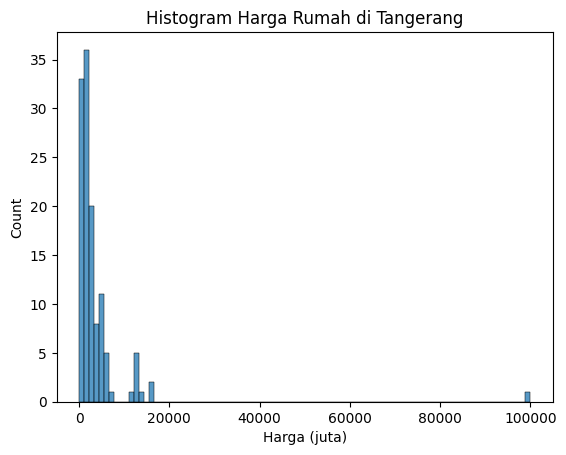

In [132]:
sns.histplot(data=dfT, x='harga').set(title='Histogram Harga Rumah di Tangerang', xlabel='Harga (juta)')
plt.show()

Karena terdapat outlier maka kita pisahkan terlebih dahulu agar mendapatkan visualisasi yang lebih baik

In [133]:
index = (dfT.harga  - dfT.harga.mean()) <= (2*dfT.harga.std())
no_outlier_tangerang = dfT[index]

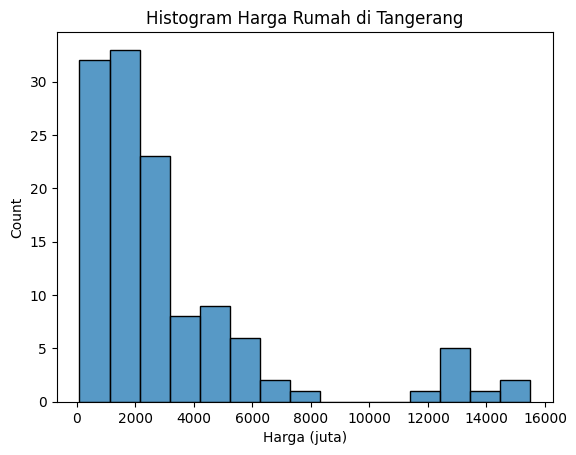

In [134]:
sns.histplot(data=no_outlier_tangerang, x='harga').set(title='Histogram Harga Rumah di Tangerang', xlabel='Harga (juta)')
plt.show()

### Scatterplot harga dengan luas bangunan

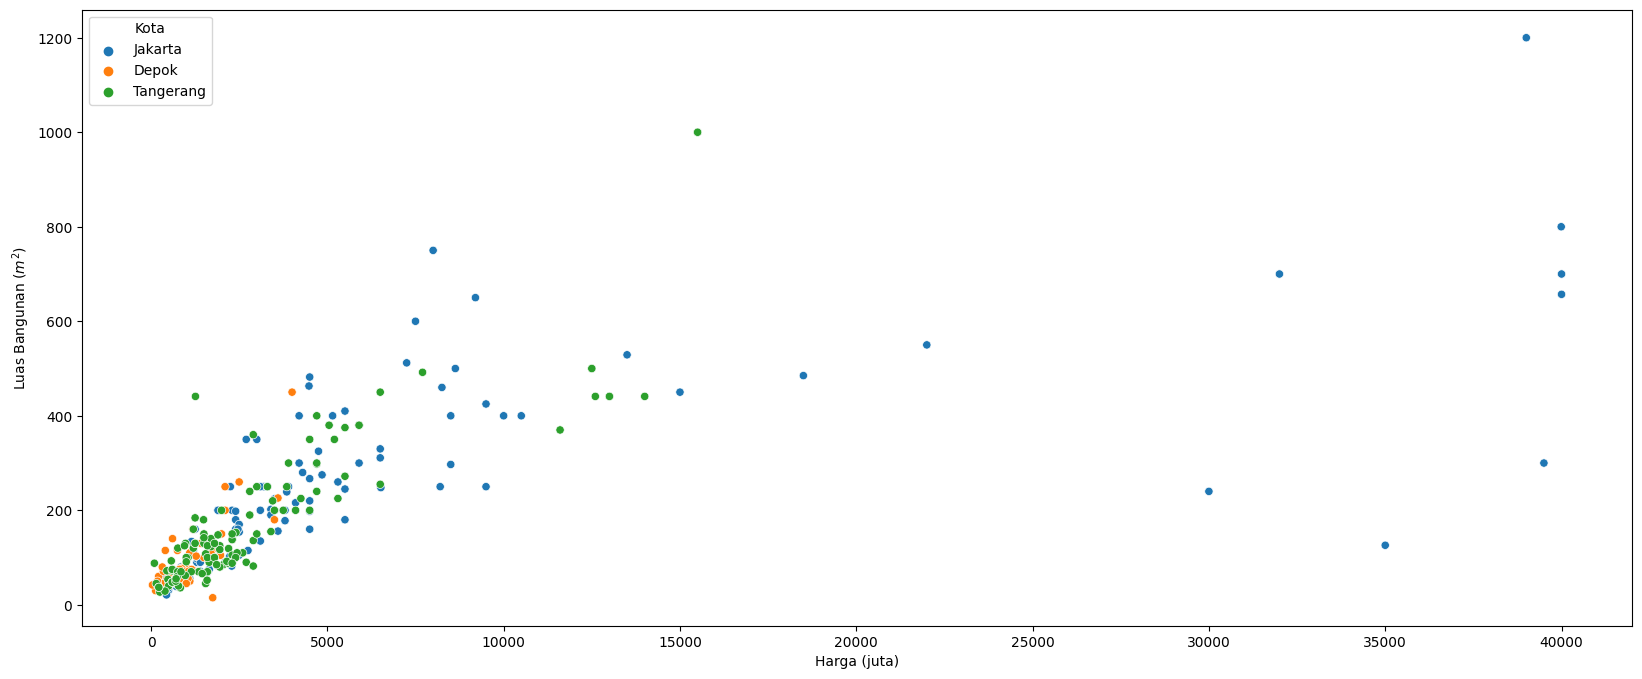

In [137]:
df_no_outlier = pd.concat([no_outlier_jakarta, no_outlier_depok, no_outlier_tangerang], ignore_index=True)

plt.figure(figsize = (20, 8))
plt.xlabel('Harga (juta)')
plt.ylabel('Luas Bangunan ($m^2$)')
p = sns.scatterplot(x="harga", y="LB", hue='Kota', data=df_no_outlier)

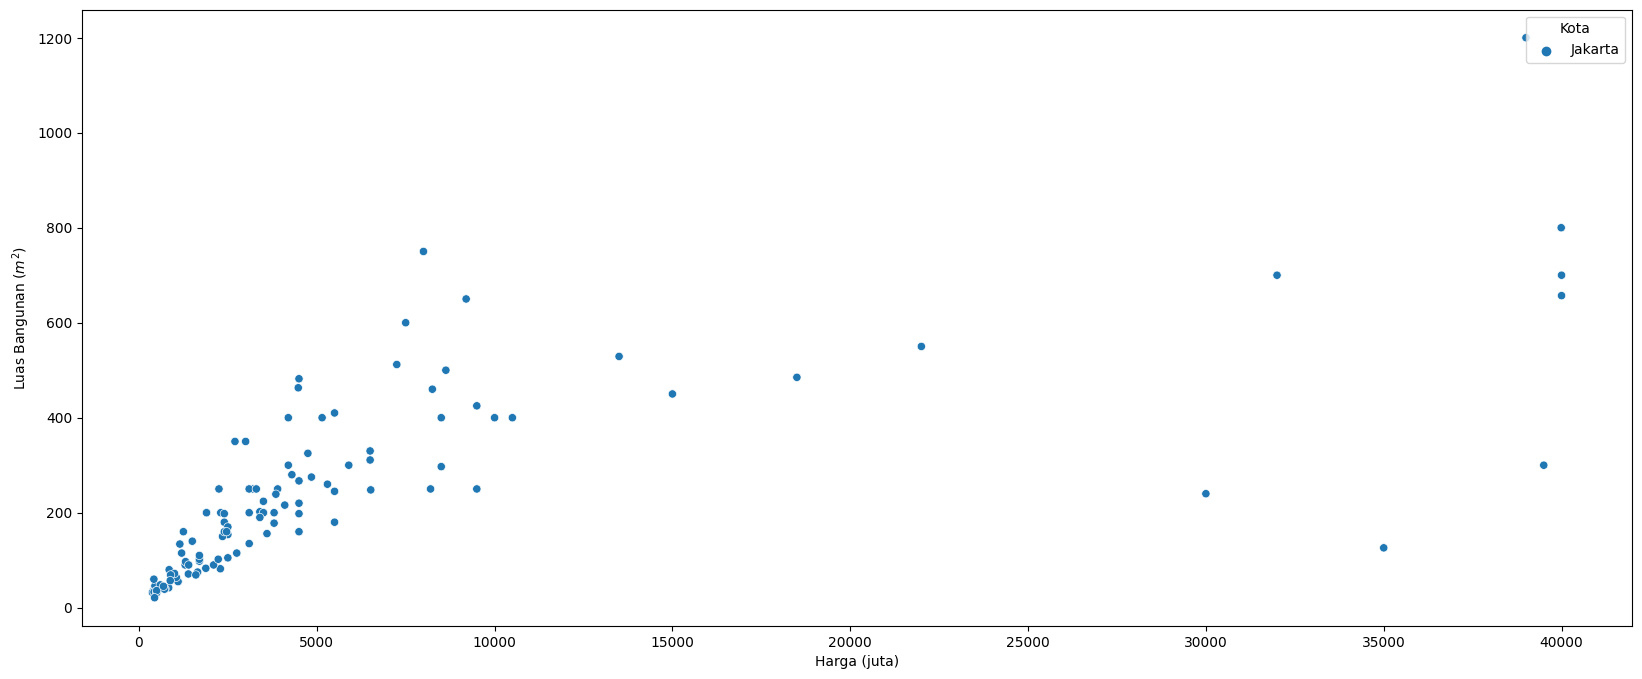

In [81]:
plt.figure(figsize = (20, 8))
plt.xlabel('Harga (juta)')
plt.ylabel('Luas Bangunan ($m^2$)')
p = sns.scatterplot(x="harga", y="LB", hue='Kota', data=no_outlier_jakarta)

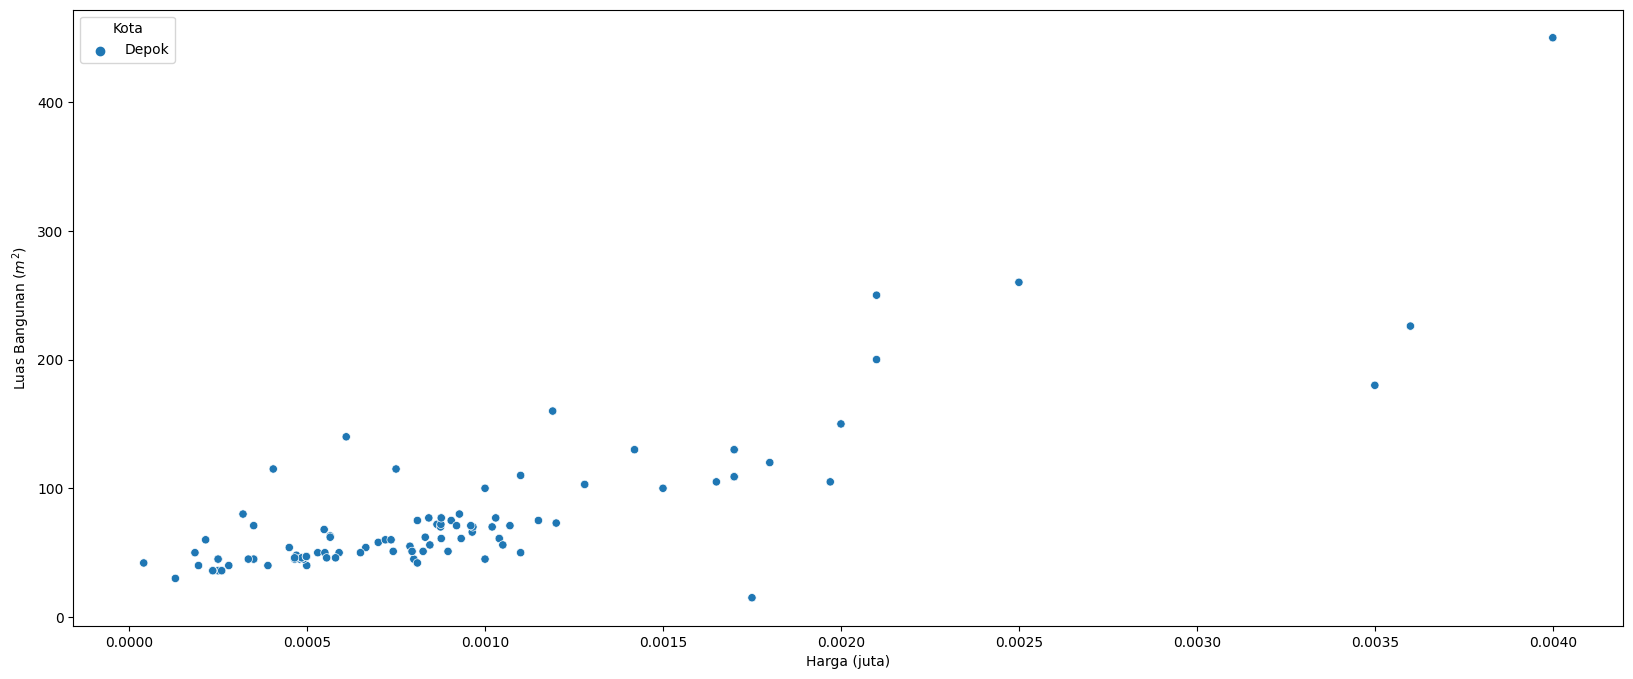

In [82]:
plt.figure(figsize = (20, 8))
plt.xlabel('Harga (juta)')
plt.ylabel('Luas Bangunan ($m^2$)')
p = sns.scatterplot(x="harga", y="LB", hue='Kota', data=no_outlier_depok)

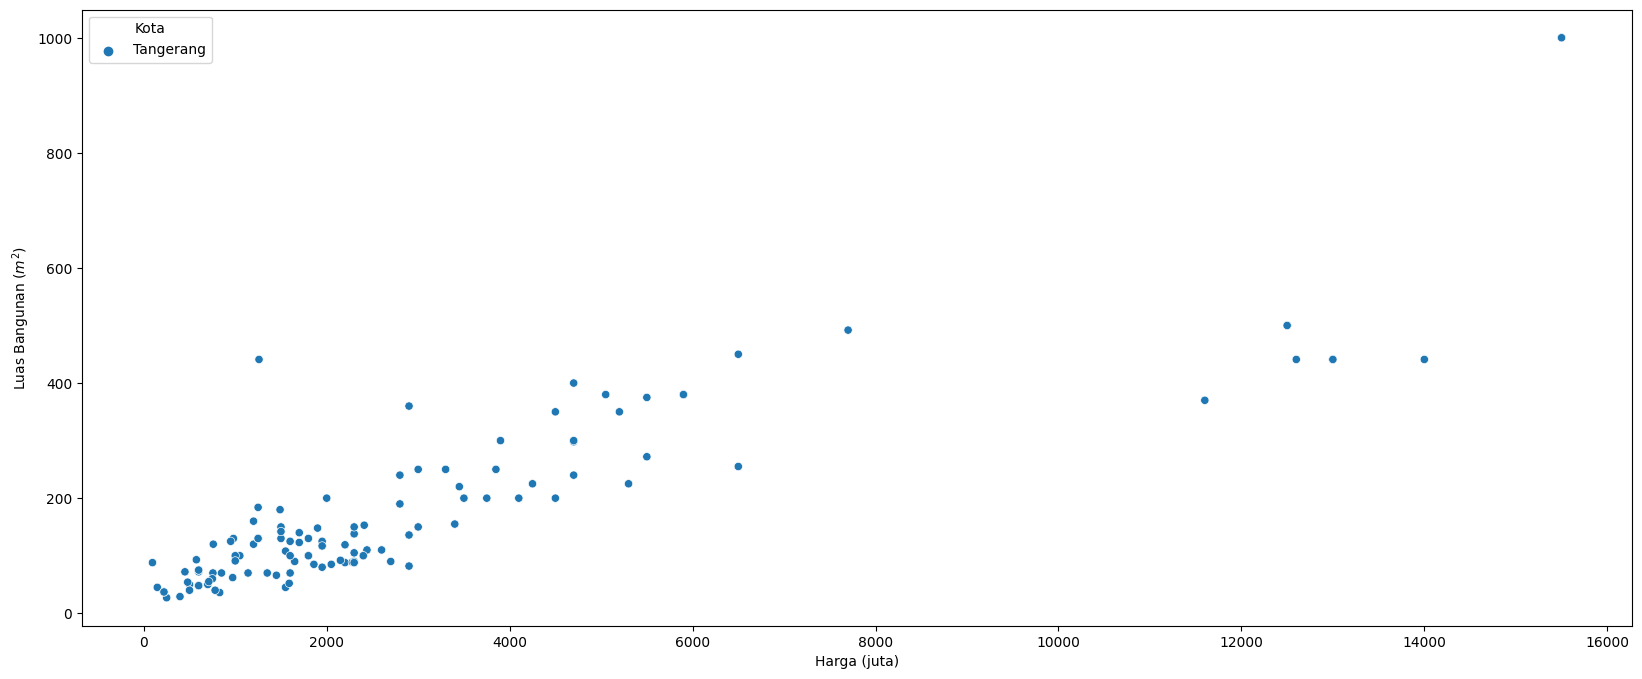

In [135]:
plt.figure(figsize = (20, 8))
plt.xlabel('Harga (juta)')
plt.ylabel('Luas Bangunan ($m^2$)')
p = sns.scatterplot(x="harga", y="LB", hue='Kota', data=no_outlier_tangerang)

### Catplot Hadap dengan harga rumah

<function matplotlib.pyplot.show(close=None, block=None)>

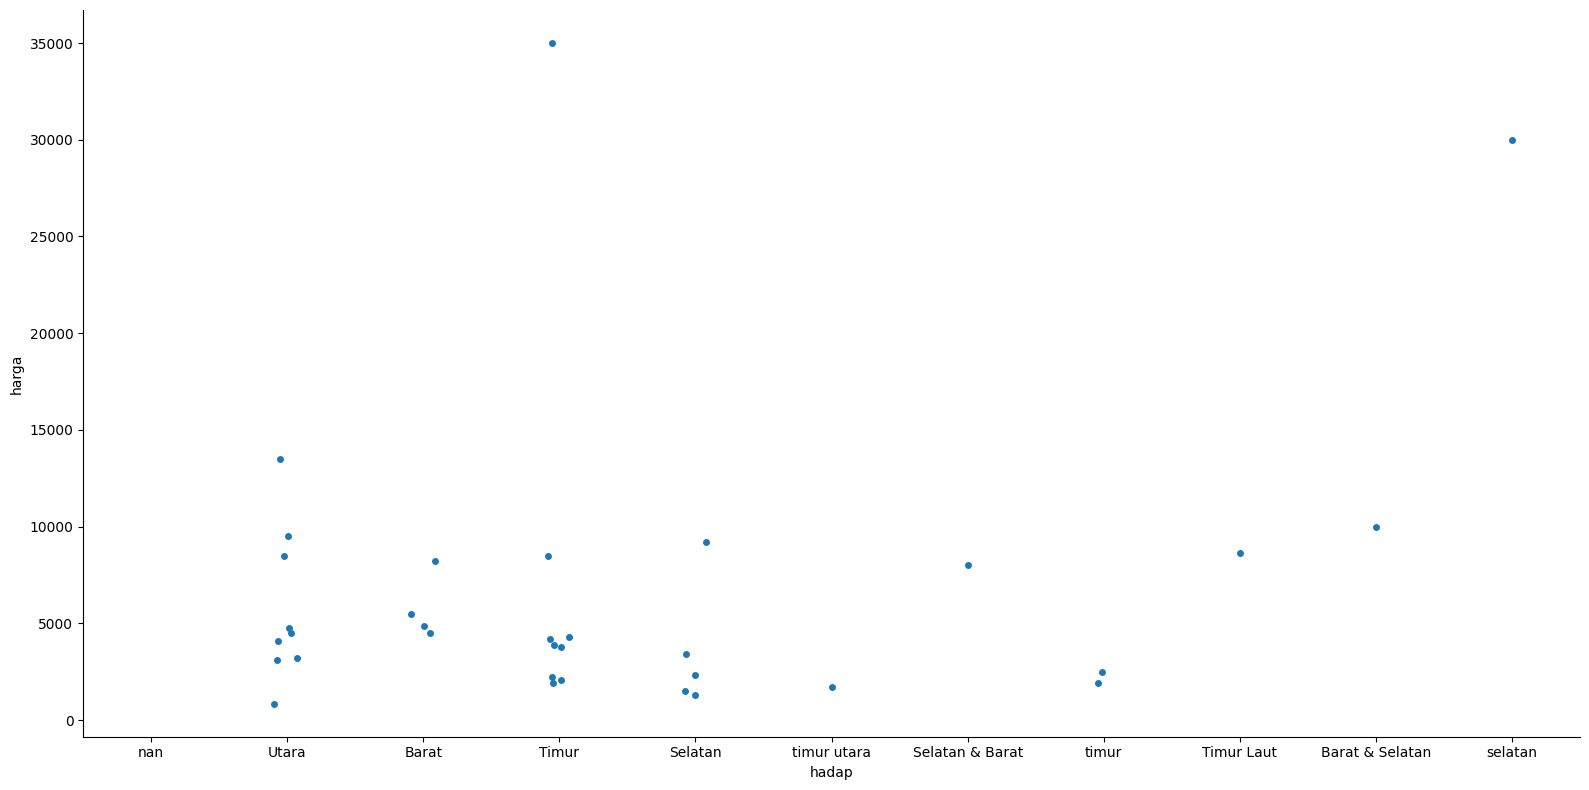

In [138]:
sns.catplot(data=no_outlier_jakarta, x='hadap', y='harga',height=8, aspect=2)
plt.show

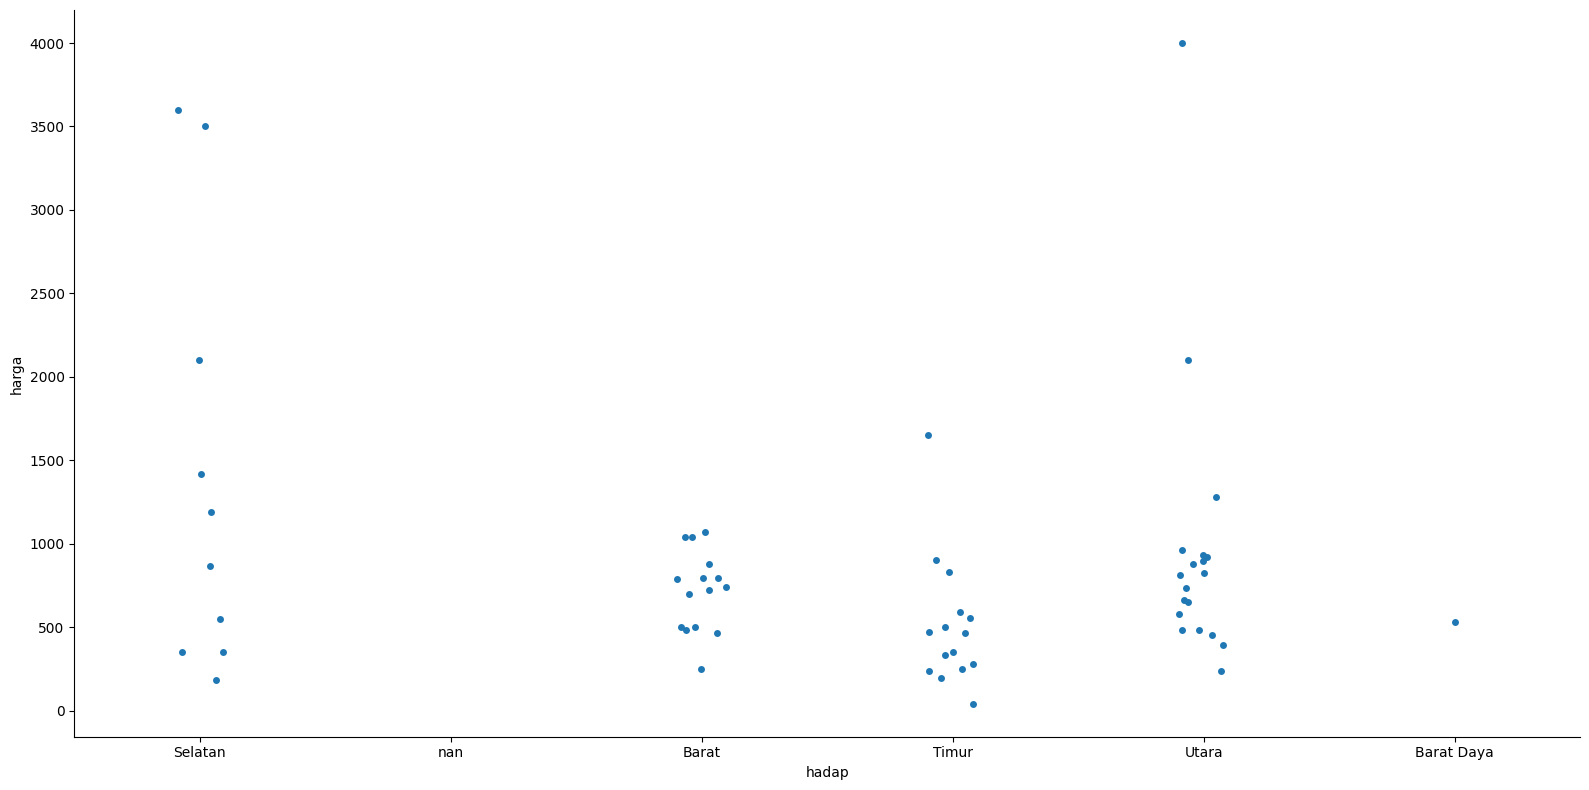

In [139]:
sns.catplot(data=no_outlier_depok, x='hadap', y='harga', height=8, aspect=2)

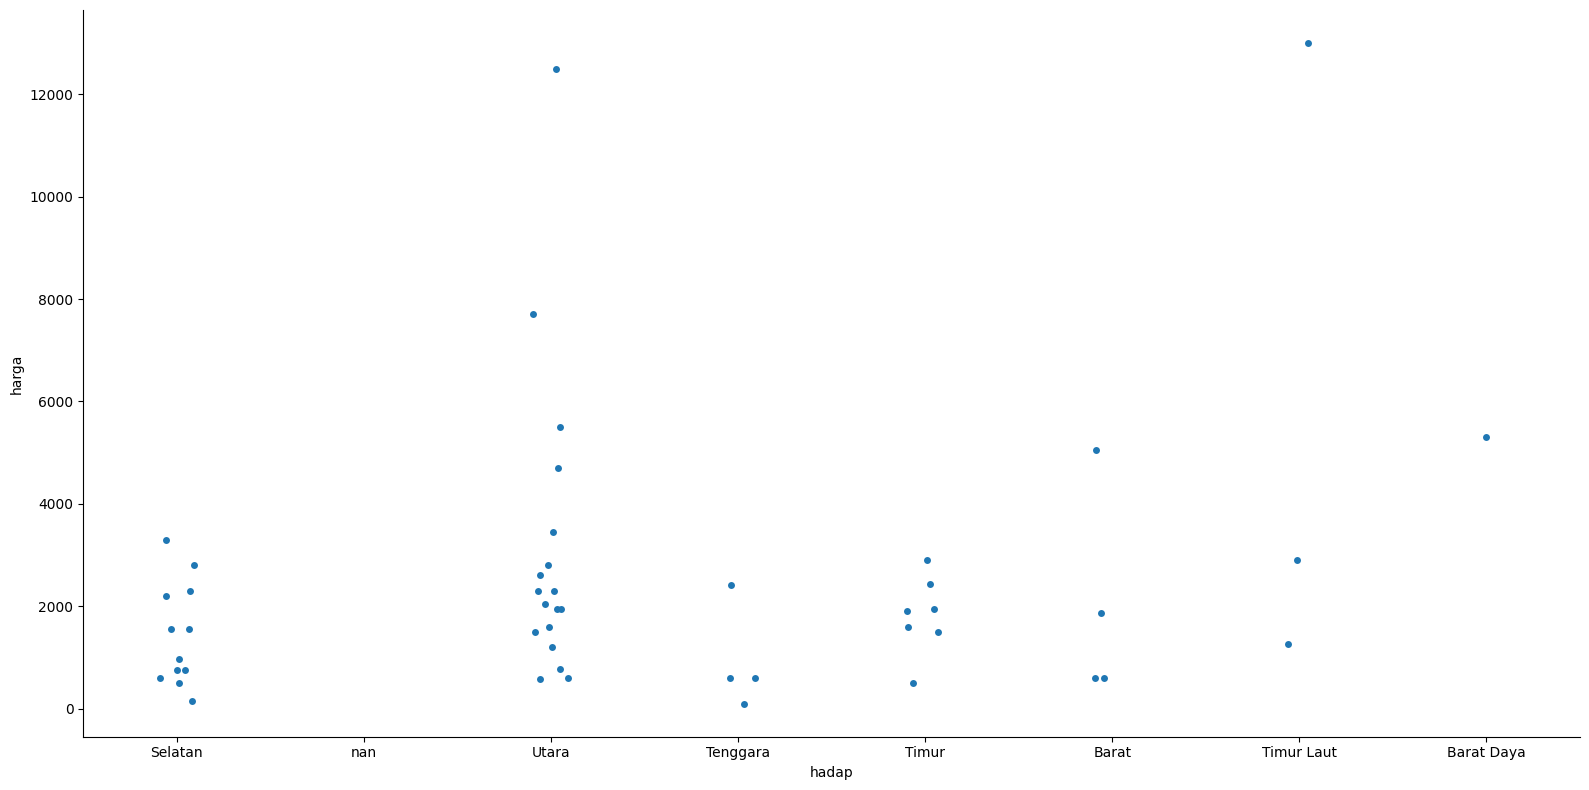

In [140]:
sns.catplot(data=no_outlier_tangerang, x='hadap', y='harga', height=8, aspect=2)

### Sertifikat

In [ ]:
df['sertifikat'].value_counts()

SHM                                304
lainnya(PPJB, GIRIK, ADAT, dll)     16
SHM + IMB                           12
HGB                                 11
SHGB                                 8
PPJB                                 7
Lainnya                              2
AJB                                  1
SHM + Hak Pakai                      1
SHM + IMB + PBB                      1
Name: sertifikat, dtype: int64

### Grouping berdasar hadap utara di daerah kota tangerang untuk melihat adakah rekomendasi yang bisa diambil

In [142]:
grouped_hadap_kota = dfT.groupby('hadap')
hadap_utara_tangerang = grouped_hadap_kota.get_group('Utara')

In [143]:
index = (hadap_utara_tangerang.harga - hadap_utara_tangerang.harga.mean()) <= (2*hadap_utara_tangerang.harga.std())
kota_no_outlier_tangerang = hadap_utara_tangerang[index]

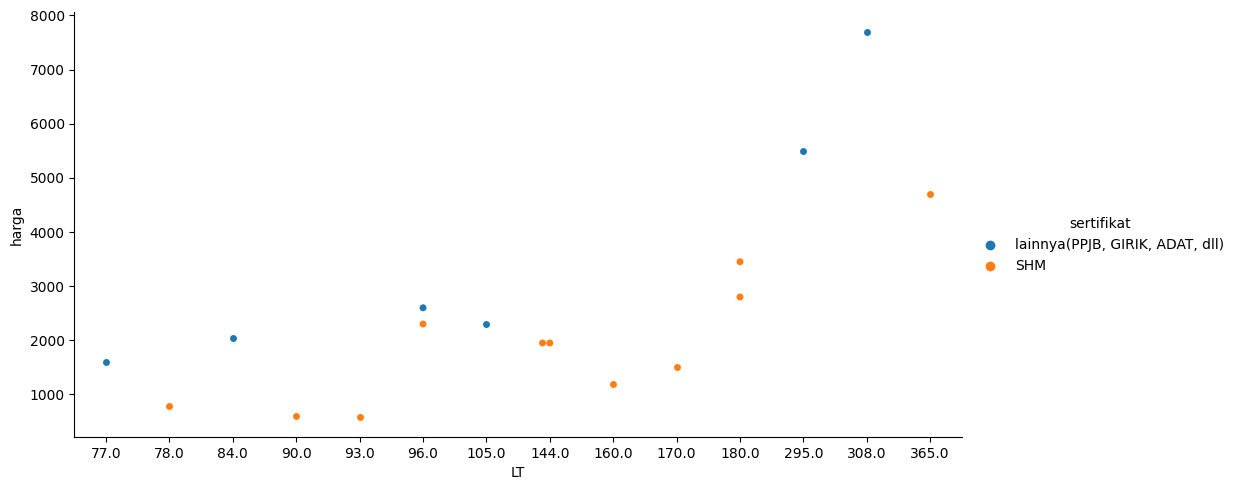

In [144]:
sns.catplot(data=kota_no_outlier_tangerang, x='LT', y='harga', hue='sertifikat', kind='swarm', height=5, aspect=2)

In [145]:
hadap_utara_tangerang[hadap_utara_tangerang['LT'] == 160]

,created_at,Kota,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
9,12-06-2021,Tangerang,160.0,160.0,3.0,2.0,NaN,NaN,"CIKUPA CITRA JAYA, TANGERANG",SHM,3500.0,Utara,1200.0,https://www.rumah123.com/properti/tangerang/ho...,"Memiliki fasilitas AC, Masjid, Taman, Keamanan..."


In [146]:
hadap_utara_tangerang[hadap_utara_tangerang['LT'] == 170]

,created_at,Kota,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
75,12-06-2021,Tangerang,170.0,150.0,4.0,2.0,NaN,1.0,"PINANG, TANGERANG",SHM,2200.0,Utara,1500.0,https://www.rumah123.com/properti/tangerang/ho...,Lokasi strategis 1 km dari tol kunciran


In [147]:
no_outlier_jakarta[no_outlier_jakarta['LT'] == 3422]

,created_at,Kota,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
14,05-12-2021,Jakarta,3422.0,64.0,1.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1050.0,https://www.rumah.com/listing-properti/dijual-...,Vlaster cempaka merupakan suatu kompleks perum...


## Kesimpulan

Dari visualisasi dan analisis yang telah dilakukan kami mendapatkan beberapa kesimpulan, yaitu sebagai berikut.
1. Kualitas data yang dimiliki masih sangat kurang karena masih terdapat banyak missing value dan skala dalam penulisan harga masih berbeda. Perlu dilakukan preprocessing yang mendalam sebelum melakukan pengolahan data.
2. Dari data yang ada teerdapat kecenderungan harga di suatu kota. Rumah di Jakarta memiliki harga jual yang lebih mahal dibandingkan dengan Depok dan Tangerang. Depok merupakan daerah dengan harga jual rumah yang cenderung lebih murah.
3. Dari data yang ada, kami menyarankan untuk RPPI membuka cabang kantor baru di kota Tangerang, karena cenderung memiliki harga yang murah dan luas bangunan yang besar, sehingga berkemungkinan lebih banyak pembelinya.
4. Rumah dengan karakteristik seperti apa yang paling banyak dijual? Rumah yang menghadap ke Utara dan bersertifikat SHM
5. Rumah yang kami rekomendasi untuk investasi RPPI
 - Rumah di Jakarta Pusat, dengan luas tanah 3422 $m^2$, harga 1.05 Milyar Rupiah. Meskipun rumah ini memiliki luas bangunan yang kecil, 64 $m^2$, tetapi rumah ini sangat menarik karena memiliki luas tanah yang sangat luas. Rumah ini juga telah memiliki sertifikat SHM. Lebih lanjut, rumah dapat dilihat melalui URL :https://www.rumah.com/listing-properti/dijual-cempaka-putih-oleh-hardi-prastian-19352202
 - Rumah di Tangerang seharga 1.2 milyar rupiah, dengan lokasi di Cikupa Citra Jaya memiliki luas tanah 160 $m^2$ dan luas bangunan 160 $m^2$, dengan 3 kamar tidur dan 2 kamar mandi, bersertifikat SHM. Lebih lanjut, rumah dapat dilihat melalui URL: https://www.rumah123.com/properti/tangerang/hos9292171/
 - Rumah di Tangerang seharga 1.5 milyar rupiah, dengan lokasi di Pinang memiliki luas tanah 170 $m^2$ dan luas bangunan 150 $m^2$, dengan 4 kamar tidur, 2 kamar mandi, dan 1 carport, bersertifikat SHM. Lebih lanjut, rumah dapat dilihat melalui URL: https://www.rumah123.com/properti/tangerang/hos9290814/
6. Di Kota Jakarta terdapat rumah dengan luas 3422 $m^2$ dengan harga miring, padahal ini berada di Jakarta Pusat yang merupakan pusat dari Ibukota negara.

Karena keterbatasan waktu, kesimpulan ini hanyalah sebagian kecil dari data yang diberikan. Masih banyak informasi lain yang bisa didapatkan dari data ini. Terima kasih.